In [3]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
df_investors = pd.read_csv('investors.csv', low_memory=False)
df_investments = pd.read_csv('investments.csv')
df_funding_rounds = pd.read_csv('funding_rounds.csv')

In [13]:
df_investments


,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,funding_round_uuid,funding_round_name,investor_uuid,investor_name,investor_type,is_lead_investor
0,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Facebook,investment,accel-partners-invested-in-facebook-series-a--...,https://www.crunchbase.com/investment/accel-pa...,NaN,2007-05-27 06:09:10,2018-02-13 00:52:57,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Facebook,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,organization,True
1,6556ab92-6465-25aa-1ffc-7f8b4b09a476,Greylock Partners investment in Series B - Fac...,investment,greylock-invested-in-facebook-series-b--6fae39...,https://www.crunchbase.com/investment/greylock...,NaN,2007-05-27 06:09:36,2018-02-13 00:53:20,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Facebook,e2006571-6b7a-e477-002a-f7014f48a7e3,Greylock Partners,organization,True
2,0216e06a-61f8-9cf1-19ba-20811229c53e,Meritech Capital Partners investment in Series...,investment,meritech-capital-partners-invested-in-facebook...,https://www.crunchbase.com/investment/meritech...,NaN,2007-05-27 06:09:36,2019-03-27 19:50:32,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Facebook,8d5c7e48-82da-3025-dd46-346a31bab86f,Meritech Capital Partners,organization,True
3,dadd7d86-520d-5e35-3033-fc1d8792ab91,Trinity Ventures investment in Series B - Phot...,investment,trinity-ventures-invested-in-photobucket-serie...,https://www.crunchbase.com/investment/trinity-...,NaN,2007-05-29 11:05:59,2018-02-13 00:55:58,bcd5a63d-ed99-6963-0dd2-e36f6582f846,Series B - Photobucket,7ca12f7a-2f8e-48b4-a8d1-1a33a0e275b9,Trinity Ventures,organization,NaN
4,581c4b38-9653-7117-9bd4-7ffe5c7eba69,Founders Fund investment in Series A - Geni,investment,founders-fund-invested-in-geni-series-a--60e6a...,https://www.crunchbase.com/investment/founders...,NaN,2007-05-31 20:19:28,2018-02-13 00:53:04,60e6afd9-1215-465a-dd17-0ed600d4e29b,Series A - Geni,fb2f8884-ec07-895a-48d7-d9a9d4d7175c,Founders Fund,organization,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448472,19c44464-1ab1-4fac-9508-8798d8f6db04,SOSV investment in Convertible Note - Planetar...,investment,sosv-invested-in-planetarians-convertible-note...,https://www.crunchbase.com/investment/sosv-inv...,NaN,2020-01-07 23:35:04,2020-01-07 23:35:04,e593cebf-be51-4cf6-bb5a-f0b18a6b04c4,Convertible Note - Planetarians,39041e62-6b24-ae8d-1347-4cea947e832c,SOSV,organization,NaN
448473,ce137325-4f4d-45e2-b285-d47ef00cb9de,MOX investment in Seed Round - PODD,investment,mox-3-invested-in-podd-seed--ef35301b--ce137325,https://www.crunchbase.com/investment/mox-3-in...,NaN,2020-01-07 23:36:42,2020-01-07 23:36:42,ef35301b-45d4-46e6-881a-f9d186e79922,Seed Round - PODD,523023cb-a5bc-c4ff-a7dd-d6d63afb983c,MOX,organization,NaN
448474,061b7643-2f27-4811-9dc1-28a7875a4975,SOSV investment in Seed Round - PODD,investment,sosv-invested-in-podd-seed--ef35301b--061b7643,https://www.crunchbase.com/investment/sosv-inv...,NaN,2020-01-07 23:36:42,2020-01-07 23:36:42,ef35301b-45d4-46e6-881a-f9d186e79922,Seed Round - PODD,39041e62-6b24-ae8d-1347-4cea947e832c,SOSV,organization,NaN
448475,5b50e36f-f9eb-4a12-99c6-55c24b9e828b,SOSV investment in Seed Round - Quidli,investment,sosv-invested-in-quidli-seed--d486cc0e--5b50e36f,https://www.crunchbase.com/investment/sosv-inv...,NaN,2020-01-07 23:42:32,2020-01-07 23:42:32,d486cc0e-20a9-4e1b-a3e2-a509137369a1,Seed Round - Quidli,39041e62-6b24-ae8d-1347-4cea947e832c,SOSV,organization,NaN


In [14]:
df_investments_investors = pd.merge(df_investments, df_investors, how='left', left_on='investor_uuid', right_on='uuid')
df_investments_investors


,uuid_x,name_x,type_x,permalink_x,cb_url_x,rank_x,created_at_x,updated_at_x,funding_round_uuid,funding_round_name,...,investment_count,total_funding_usd,total_funding,total_funding_currency_code,founded_on,closed_on,facebook_url,linkedin_url,twitter_url,logo_url
0,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Facebook,investment,accel-partners-invested-in-facebook-series-a--...,https://www.crunchbase.com/investment/accel-pa...,NaN,2007-05-27 06:09:10,2018-02-13 00:52:57,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Facebook,...,1366.0,NaN,NaN,NaN,1983-01-01,NaN,http://www.facebook.com/accel,https://www.linkedin.com/company/accel-vc/,http://twitter.com/accel,https://crunchbase-production-res.cloudinary.c...
1,6556ab92-6465-25aa-1ffc-7f8b4b09a476,Greylock Partners investment in Series B - Fac...,investment,greylock-invested-in-facebook-series-b--6fae39...,https://www.crunchbase.com/investment/greylock...,NaN,2007-05-27 06:09:36,2018-02-13 00:53:20,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Facebook,...,691.0,NaN,NaN,NaN,1965-10-01,NaN,http://www.facebook.com/Greylock,http://www.linkedin.com/company/18077,http://twitter.com/greylockvc,https://crunchbase-production-res.cloudinary.c...
2,0216e06a-61f8-9cf1-19ba-20811229c53e,Meritech Capital Partners investment in Series...,investment,meritech-capital-partners-invested-in-facebook...,https://www.crunchbase.com/investment/meritech...,NaN,2007-05-27 06:09:36,2019-03-27 19:50:32,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Facebook,...,256.0,NaN,NaN,NaN,1999-01-01,NaN,http://www.facebook.com/MeritechCapital,NaN,http://twitter.com/MeritechCapital,https://crunchbase-production-res.cloudinary.c...
3,dadd7d86-520d-5e35-3033-fc1d8792ab91,Trinity Ventures investment in Series B - Phot...,investment,trinity-ventures-invested-in-photobucket-serie...,https://www.crunchbase.com/investment/trinity-...,NaN,2007-05-29 11:05:59,2018-02-13 00:55:58,bcd5a63d-ed99-6963-0dd2-e36f6582f846,Series B - Photobucket,...,399.0,NaN,NaN,NaN,1986-01-01,NaN,http://www.facebook.com/pages/Menlo-Park-CA/Tr...,http://www.linkedin.com/company/trinity-ventures,http://twitter.com/trinityventures,https://crunchbase-production-res.cloudinary.c...
4,581c4b38-9653-7117-9bd4-7ffe5c7eba69,Founders Fund investment in Series A - Geni,investment,founders-fund-invested-in-geni-series-a--60e6a...,https://www.crunchbase.com/investment/founders...,NaN,2007-05-31 20:19:28,2018-02-13 00:53:04,60e6afd9-1215-465a-dd17-0ed600d4e29b,Series A - Geni,...,508.0,NaN,NaN,NaN,2005-07-01,NaN,https://www.facebook.com/foundersfund,https://www.linkedin.com/company/the-founders-...,http://twitter.com/foundersfund,https://crunchbase-production-res.cloudinary.c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448472,19c44464-1ab1-4fac-9508-8798d8f6db04,SOSV investment in Convertible Note - Planetar...,investment,sosv-invested-in-planetarians-convertible-note...,https://www.crunchbase.com/investment/sosv-inv...,NaN,2020-01-07 23:35:04,2020-01-07 23:35:04,e593cebf-be51-4cf6-bb5a-f0b18a6b04c4,Convertible Note - Planetarians,...,1536.0,NaN,NaN,NaN,1994-04-19,NaN,https://www.facebook.com/SOSVvc/,https://www.linkedin.com/company/sosvvc/,https://twitter.com/SOSV,https://crunchbase-production-res.cloudinary.c...
448473,ce137325-4f4d-45e2-b285-d47ef00cb9de,MOX investment in Seed Round - PODD,investment,mox-3-invested-in-podd-seed--ef35301b--ce137325,https://www.crunchbase.com/investment/mox-3-in...,NaN,2020-01-07 23:36:42,2020-01-07 23:36:42,ef35301b-45d4-46e6-881a-f9d186e79922,Seed Round - PODD,...,62.0,NaN,NaN,NaN,2016-01-01,NaN,https://www.facebook.com/mobileonlyx/,https://www.linkedin.com/company/mobile-only-a...,https://twitter.com/mobileonlyx,https://crunchbase-production-res.cloudinary.c...
448474,061b7643-2f27-4811-9dc1-28a7875a4975,SOSV investment in Seed Round - PODD,investment,sosv-invested-in-podd-seed--ef35301b--061b7643,https://www.crunchbase.com/investment/sosv-inv...,NaN,2

In [16]:
df_investments_investors_funding = pd.merge(df_investments_investors, df_funding_rounds, how='left', left_on='funding_round_uuid', right_on='uuid')
df_investments_investors_funding

,uuid_x,name_x,type_x,permalink_x,cb_url_x,rank_x,created_at_x,updated_at_x,funding_round_uuid,funding_round_name,...,raised_amount_usd,raised_amount,raised_amount_currency_code,post_money_valuation_usd,post_money_valuation,post_money_valuation_currency_code,investor_count,org_uuid,org_name,lead_investor_uuids
0,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Facebook,investment,accel-partners-invested-in-facebook-series-a--...,https://www.crunchbase.com/investment/accel-pa...,NaN,2007-05-27 06:09:10,2018-02-13 00:52:57,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Facebook,...,12700000.0,12700000.0,USD,98000000.0,98000000.0,USD,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,b08efc27-da40-505a-6f9d-c9e14247bf36
1,6556ab92-6465-25aa-1ffc-7f8b4b09a476,Greylock Partners investment in Series B - Fac...,investment,greylock-invested-in-facebook-series-b--6fae39...,https://www.crunchbase.com/investment/greylock...,NaN,2007-05-27 06:09:36,2018-02-13 00:53:20,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Facebook,...,27500000.0,27500000.0,USD,502500000.0,502500000.0,USD,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,"e2006571-6b7a-e477-002a-f7014f48a7e3,8d5c7e48-..."
2,0216e06a-61f8-9cf1-19ba-20811229c53e,Meritech Capital Partners investment in Series...,investment,meritech-capital-partners-invested-in-facebook...,https://www.crunchbase.com/investment/meritech...,NaN,2007-05-27 06:09:36,2019-03-27 19:50:32,6fae3958-a001-27c0-fb7e-666266aedd78,Series B - Facebook,...,27500000.0,27500000.0,USD,502500000.0,502500000.0,USD,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,"e2006571-6b7a-e477-002a-f7014f48a7e3,8d5c7e48-..."
3,dadd7d86-520d-5e35-3033-fc1d8792ab91,Trinity Ventures investment in Series B - Phot...,investment,trinity-ventures-invested-in-photobucket-serie...,https://www.crunchbase.com/investment/trinity-...,NaN,2007-05-29 11:05:59,2018-02-13 00:55:58,bcd5a63d-ed99-6963-0dd2-e36f6582f846,Series B - Photobucket,...,10500000.0,10500000.0,USD,NaN,NaN,USD,2.0,f53cb4de-236e-0b1b-dee8-7104a8b018f9,Photobucket,NaN
4,581c4b38-9653-7117-9bd4-7ffe5c7eba69,Founders Fund investment in Series A - Geni,investment,founders-fund-invested-in-geni-series-a--60e6a...,https://www.crunchbase.com/investment/founders...,NaN,2007-05-31 20:19:28,2018-02-13 00:53:04,60e6afd9-1215-465a-dd17-0ed600d4e29b,Series A - Geni,...,NaN,NaN,NaN,10000000.0,10000000.0,USD,1.0,4111dc8b-c0df-2d24-ed33-30cd137b3098,Geni,fb2f8884-ec07-895a-48d7-d9a9d4d7175c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448472,19c44464-1ab1-4fac-9508-8798d8f6db04,SOSV investment in Convertible Note - Planetar...,investment,sosv-invested-in-planetarians-convertible-note...,https://www.crunchbase.com/investment/sosv-inv...,NaN,2020-01-07 23:35:04,2020-01-07 23:35:04,e593cebf-be51-4cf6-bb5a-f0b18a6b04c4,Convertible Note - Planetarians,...,NaN,NaN,NaN,NaN,NaN,USD,2.0,bf6d3b88-e5c3-b3b3-7931-f9bb3eb06bb5,Planetarians,NaN
448473,ce137325-4f4d-45e2-b285-d47ef00cb9de,MOX investment in Seed Round - PODD,investment,mox-3-invested-in-podd-seed--ef35301b--ce137325,https://www.crunchbase.com/investment/mox-3-in...,NaN,2020-01-07 23:36:42,2020-01-07 23:36:42,ef35301b-45d4-46e6-881a-f9d186e79922,Seed Round - PODD,...,NaN,NaN,NaN,NaN,NaN,USD,2.0,3545c952-22d2-7e1a-5bee-339525742fe3,PODD,NaN
448474,061b7643-2f27-4811-9dc1-28a7875a4975,SOSV investment in Seed Round - PODD,investment,sosv-invested-in-podd-seed--ef35301b--061b7643,https://www.crunchbase.com/investment/sosv-inv...,NaN,2020-01-07 23:36:42,2020-01-07 23:36:42,ef35301b-45d4-46e6-881a-f9d186e79922,Seed Round - PODD,...,NaN,NaN,NaN,NaN,NaN,USD,2.0,3545c952-22d2-7e1a-5bee-339525742fe3,PODD,NaN
448475,5b50e36f-f9eb-4a12-99c6-55c24b9e828b,SOSV investment in Seed Round - Quidli,investment,sosv-invested-in-quidli-seed--d486cc0e--5b50e36f,https://www.crunchbase.com/investment/sosv-inv...,NaN,2020-01-07 23:42:32,2020-01-07 23:42:32,d486cc0e-20a9-4e1b-a3e2-a509137369a1,Seed Round - Qu

In [17]:
df_investments_investors_funding.columns

Index(['uuid_x', 'name_x', 'type_x', 'permalink_x', 'cb_url_x', 'rank_x',
       'created_at_x', 'updated_at_x', 'funding_round_uuid',
       'funding_round_name', 'investor_uuid', 'investor_name', 'investor_type',
       'is_lead_investor', 'uuid_y', 'name_y', 'type_y', 'permalink_y',
       'cb_url_y', 'rank_y', 'created_at_y', 'updated_at_y', 'roles', 'domain',
       'country_code_x', 'state_code_x', 'region_x', 'city_x',
       'investor_types', 'investment_count', 'total_funding_usd',
       'total_funding', 'total_funding_currency_code', 'founded_on',
       'closed_on', 'facebook_url', 'linkedin_url', 'twitter_url', 'logo_url',
       'uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'country_code_y', 'state_code_y', 'region_y', 'city_y',
       'investment_type', 'announced_on', 'raised_amount_usd', 'raised_amount',
       'raised_amount_currency_code', 'post_money_valuation_usd',
       'post_money_valuation', 'post_money_valuation_curr

In [46]:
df_geo = df_investments_investors_funding[['uuid_x', 'name_x', 'type_x', 'investor_uuid', 'investor_name', 'investor_type', 'announced_on', 'is_lead_investor',
       'country_code_x', 'state_code_x', 'region_x', 'city_x',
       'investor_types', 'investment_count', 'founded_on',
       'closed_on','uuid', 'name', 'type', 'country_code_y', 'state_code_y', 'region_y', 'city_y',
       'investor_count', 'org_uuid', 'org_name', 'lead_investor_uuids']]
df_geo

,uuid_x,name_x,type_x,investor_uuid,investor_name,investor_type,announced_on,is_lead_investor,country_code_x,state_code_x,...,name,type,country_code_y,state_code_y,region_y,city_y,investor_count,org_uuid,org_name,lead_investor_uuids
0,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Facebook,investment,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,organization,2005-05-01,True,USA,CA,...,Series A - Facebook,funding_round,USA,CA,California,Menlo Park,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,b08efc27-da40-505a-6f9d-c9e14247bf36
1,6556ab92-6465-25aa-1ffc-7f8b4b09a476,Greylock Partners investment in Series B - Fac...,investment,e2006571-6b7a-e477-002a-f7014f48a7e3,Greylock Partners,organization,2006-04-01,True,USA,CA,...,Series B - Facebook,funding_round,USA,CA,California,Menlo Park,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,"e2006571-6b7a-e477-002a-f7014f48a7e3,8d5c7e48-..."
2,0216e06a-61f8-9cf1-19ba-20811229c53e,Meritech Capital Partners investment in Series...,investment,8d5c7e48-82da-3025-dd46-346a31bab86f,Meritech Capital Partners,organization,2006-04-01,True,USA,CA,...,Series B - Facebook,funding_round,USA,CA,California,Menlo Park,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,"e2006571-6b7a-e477-002a-f7014f48a7e3,8d5c7e48-..."
3,dadd7d86-520d-5e35-3033-fc1d8792ab91,Trinity Ventures investment in Series B - Phot...,investment,7ca12f7a-2f8e-48b4-a8d1-1a33a0e275b9,Trinity Ventures,organization,2006-05-01,NaN,USA,CA,...,Series B - Photobucket,funding_round,USA,CO,Colorado,Denver,2.0,f53cb4de-236e-0b1b-dee8-7104a8b018f9,Photobucket,NaN
4,581c4b38-9653-7117-9bd4-7ffe5c7eba69,Founders Fund investment in Series A - Geni,investment,fb2f8884-ec07-895a-48d7-d9a9d4d7175c,Founders Fund,organization,2007-01-17,True,USA,CA,...,Series A - Geni,funding_round,USA,CA,California,West Hollywood,1.0,4111dc8b-c0df-2d24-ed33-30cd137b3098,Geni,fb2f8884-ec07-895a-48d7-d9a9d4d7175c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448472,19c44464-1ab1-4fac-9508-8798d8f6db04,SOSV investment in Convertible Note - Planetar...,investment,39041e62-6b24-ae8d-1347-4cea947e832c,SOSV,organization,2019-12-17,NaN,USA,NJ,...,Convertible Note - Planetarians,funding_round,USA,CA,California,Palo Alto,2.0,bf6d3b88-e5c3-b3b3-7931-f9bb3eb06bb5,Planetarians,NaN
448473,ce137325-4f4d-45e2-b285-d47ef00cb9de,MOX investment in Seed Round - PODD,investment,523023cb-a5bc-c4ff-a7dd-d6d63afb983c,MOX,organization,2019-10-24,NaN,TWN,NaN,...,Seed Round - PODD,funding_round,NaN,NaN,NaN,NaN,2.0,3545c952-22d2-7e1a-5bee-339525742fe3,PODD,NaN
448474,061b7643-2f27-4811-9dc1-28a7875a4975,SOSV investment in Seed Round - PODD,investment,39041e62-6b24-ae8d-1347-4cea947e832c,SOSV,organization,2019-10-24,NaN,USA,NJ,...,Seed Round - PODD,funding_round,NaN,NaN,NaN,NaN,2.0,3545c952-22d2-7e1a-5bee-339525742fe3,PODD,NaN
448475,5b50e36f-f9eb-4a12-99c6-55c24b9e828b,SOSV investment in Seed Round - Quidli,investment,39041e62-6b24-ae8d-1347-4cea947e832c,SOSV,organization,2019-11-13,NaN,USA,NJ,...,Seed Round - Quidli,funding_round,FRA,NaN,Ile-de-France,Paris,2.0,03093a7f-4478-4e64-a541-fc1d54014d26,Quidli,NaN


In [47]:
df_geo.rename(columns={"uuid_x":"investment_uuid"}, inplace =True)
df_geo.rename(columns={"name_x":"investment_name"}, inplace = True)
df_geo.rename(columns={"type_x":"investment_type"}, inplace = True)
df_geo.rename(columns={"country_code_x":"investor_country_code"}, inplace = True)
df_geo.rename(columns={"state_code_x":"investor_state_code"}, inplace = True)
df_geo.rename(columns={"region_x":"investor_region"}, inplace = True)
df_geo.rename(columns={"city_x":"investor_city"}, inplace = True)
df_geo.rename(columns={"investment_count":"investor_num_of_investments"}, inplace = True)
df_geo.rename(columns={"uuid":"fr_uuid"}, inplace =True)
df_geo.rename(columns={"country_code_y":"org_country_code"}, inplace = True)
df_geo.rename(columns={"state_code_y":"org_state_code"}, inplace = True)
df_geo.rename(columns={"region_y":"org_region"}, inplace = True)
df_geo.rename(columns={"city_y":"org_city"}, inplace = True)
df_geo.rename(columns={"investor_count":"fr_num_of_investors"}, inplace = True)
df_geo

/var/folders/0p/1wnjwtnn3pj6j8my62tq6c1h0000gn/T/ipykernel_15133/2081681300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo.rename(columns={"uuid_x":"investment_uuid"}, inplace =True)
/var/folders/0p/1wnjwtnn3pj6j8my62tq6c1h0000gn/T/ipykernel_15133/2081681300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo.rename(columns={"name_x":"investment_name"}, inplace = True)
/var/folders/0p/1wnjwtnn3pj6j8my62tq6c1h0000gn/T/ipykernel_15133/2081681300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

,investment_uuid,investment_name,investment_type,investor_uuid,investor_name,investor_type,announced_on,is_lead_investor,investor_country_code,investor_state_code,...,name,type,org_country_code,org_state_code,org_region,org_city,fr_num_of_investors,org_uuid,org_name,lead_investor_uuids
0,524986f0-3049-54a4-fa72-f60897a5e61d,Accel investment in Series A - Facebook,investment,b08efc27-da40-505a-6f9d-c9e14247bf36,Accel,organization,2005-05-01,True,USA,CA,...,Series A - Facebook,funding_round,USA,CA,California,Menlo Park,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,b08efc27-da40-505a-6f9d-c9e14247bf36
1,6556ab92-6465-25aa-1ffc-7f8b4b09a476,Greylock Partners investment in Series B - Fac...,investment,e2006571-6b7a-e477-002a-f7014f48a7e3,Greylock Partners,organization,2006-04-01,True,USA,CA,...,Series B - Facebook,funding_round,USA,CA,California,Menlo Park,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,"e2006571-6b7a-e477-002a-f7014f48a7e3,8d5c7e48-..."
2,0216e06a-61f8-9cf1-19ba-20811229c53e,Meritech Capital Partners investment in Series...,investment,8d5c7e48-82da-3025-dd46-346a31bab86f,Meritech Capital Partners,organization,2006-04-01,True,USA,CA,...,Series B - Facebook,funding_round,USA,CA,California,Menlo Park,5.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Facebook,"e2006571-6b7a-e477-002a-f7014f48a7e3,8d5c7e48-..."
3,dadd7d86-520d-5e35-3033-fc1d8792ab91,Trinity Ventures investment in Series B - Phot...,investment,7ca12f7a-2f8e-48b4-a8d1-1a33a0e275b9,Trinity Ventures,organization,2006-05-01,NaN,USA,CA,...,Series B - Photobucket,funding_round,USA,CO,Colorado,Denver,2.0,f53cb4de-236e-0b1b-dee8-7104a8b018f9,Photobucket,NaN
4,581c4b38-9653-7117-9bd4-7ffe5c7eba69,Founders Fund investment in Series A - Geni,investment,fb2f8884-ec07-895a-48d7-d9a9d4d7175c,Founders Fund,organization,2007-01-17,True,USA,CA,...,Series A - Geni,funding_round,USA,CA,California,West Hollywood,1.0,4111dc8b-c0df-2d24-ed33-30cd137b3098,Geni,fb2f8884-ec07-895a-48d7-d9a9d4d7175c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448472,19c44464-1ab1-4fac-9508-8798d8f6db04,SOSV investment in Convertible Note - Planetar...,investment,39041e62-6b24-ae8d-1347-4cea947e832c,SOSV,organization,2019-12-17,NaN,USA,NJ,...,Convertible Note - Planetarians,funding_round,USA,CA,California,Palo Alto,2.0,bf6d3b88-e5c3-b3b3-7931-f9bb3eb06bb5,Planetarians,NaN
448473,ce137325-4f4d-45e2-b285-d47ef00cb9de,MOX investment in Seed Round - PODD,investment,523023cb-a5bc-c4ff-a7dd-d6d63afb983c,MOX,organization,2019-10-24,NaN,TWN,NaN,...,Seed Round - PODD,funding_round,NaN,NaN,NaN,NaN,2.0,3545c952-22d2-7e1a-5bee-339525742fe3,PODD,NaN
448474,061b7643-2f27-4811-9dc1-28a7875a4975,SOSV investment in Seed Round - PODD,investment,39041e62-6b24-ae8d-1347-4cea947e832c,SOSV,organization,2019-10-24,NaN,USA,NJ,...,Seed Round - PODD,funding_round,NaN,NaN,NaN,NaN,2.0,3545c952-22d2-7e1a-5bee-339525742fe3,PODD,NaN
448475,5b50e36f-f9eb-4a12-99c6-55c24b9e828b,SOSV investment in Seed Round - Quidli,investment,39041e62-6b24-ae8d-1347-4cea947e832c,SOSV,organization,2019-11-13,NaN,USA,NJ,...,Seed Round - Quidli,funding_round,FRA,NaN,Ile-de-France,Paris,2.0,03093a7f-4478-4e64-a541-fc1d54014d26,Quidli,NaN


In [48]:
df_geo.to_csv('investments_investors_funding_geo2.csv', index=False)

/var/folders/0p/1wnjwtnn3pj6j8my62tq6c1h0000gn/T/ipykernel_15133/3814084484.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_investors = pd.read_csv('investors.csv')


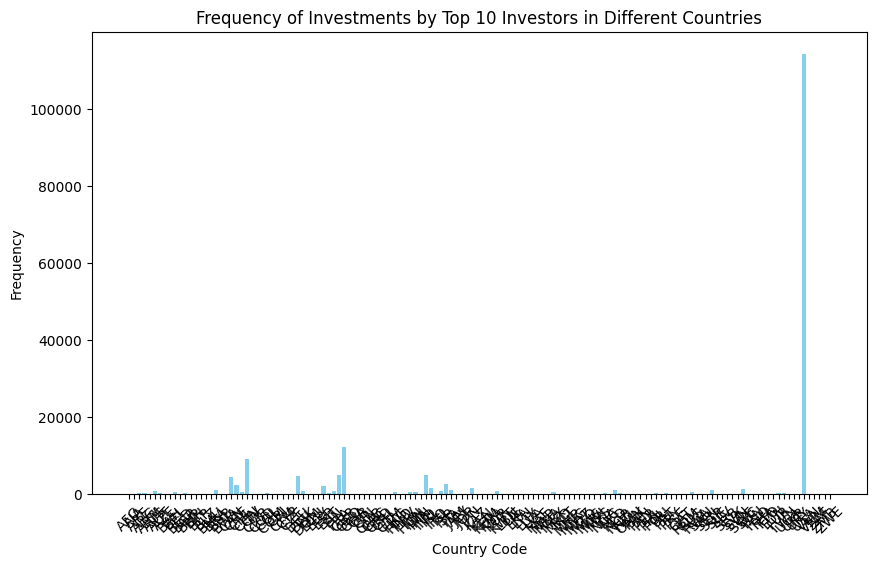

In [39]:
df_investors = pd.read_csv('investors.csv')
top_investors = df_investors.sort_values(by='investment_count', ascending=False).head(1000)
filtered_df_geo = df_geo[df_geo['investor_uuid'].isin(top_investors['uuid'])]
country_freq = filtered_df_geo.groupby('org_country_code').size().reset_index(name='frequency')

plt.figure(figsize=(10, 6))
plt.bar(country_freq['org_country_code'], country_freq['frequency'], color='skyblue')
plt.xlabel('Country Code')
plt.ylabel('Frequency')
plt.title('Frequency of Investments by Top 10 Investors in Different Countries')
plt.xticks(rotation=45)
plt.show()

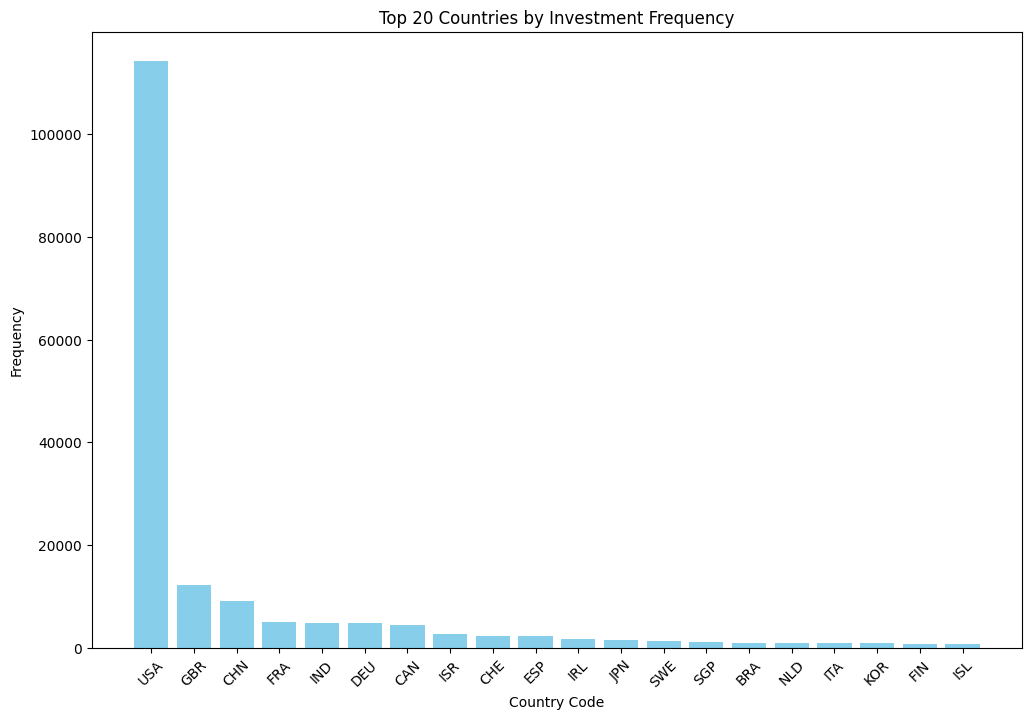

In [41]:
country_freq = country_freq.sort_values(by='frequency', ascending=False).head(20)

plt.figure(figsize=(12, 8))
plt.bar(country_freq['org_country_code'], country_freq['frequency'], color='skyblue')
plt.xlabel('Country Code')
plt.ylabel('Frequency')
plt.title('Top 20 Countries by Investment Frequency')
plt.xticks(rotation=45)
plt.show()

country_code_match
True     314450
False    134027
Name: count, dtype: int64


/var/folders/0p/1wnjwtnn3pj6j8my62tq6c1h0000gn/T/ipykernel_15133/1293361652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geo['country_code_match'] = df_geo['investor_country_code'] == df_geo['org_country_code']


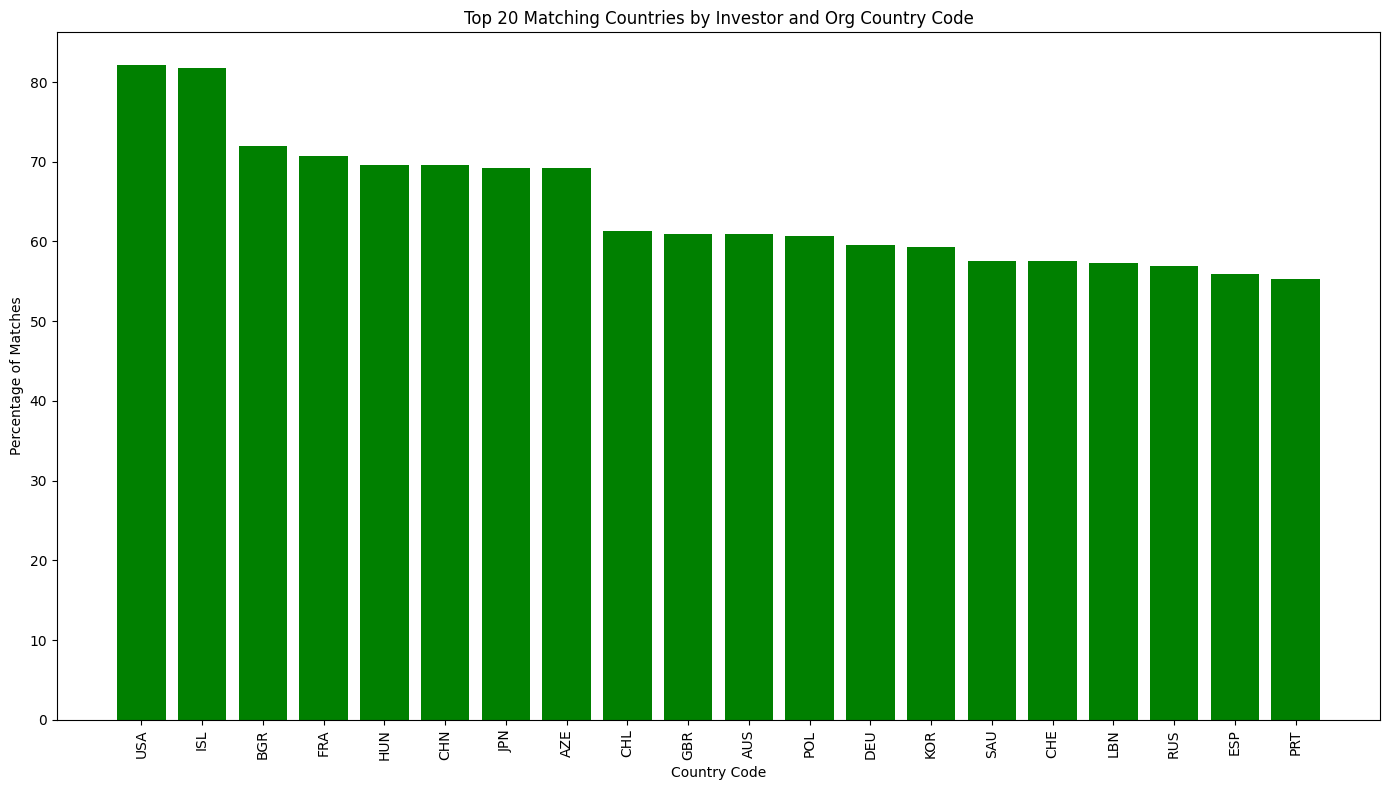

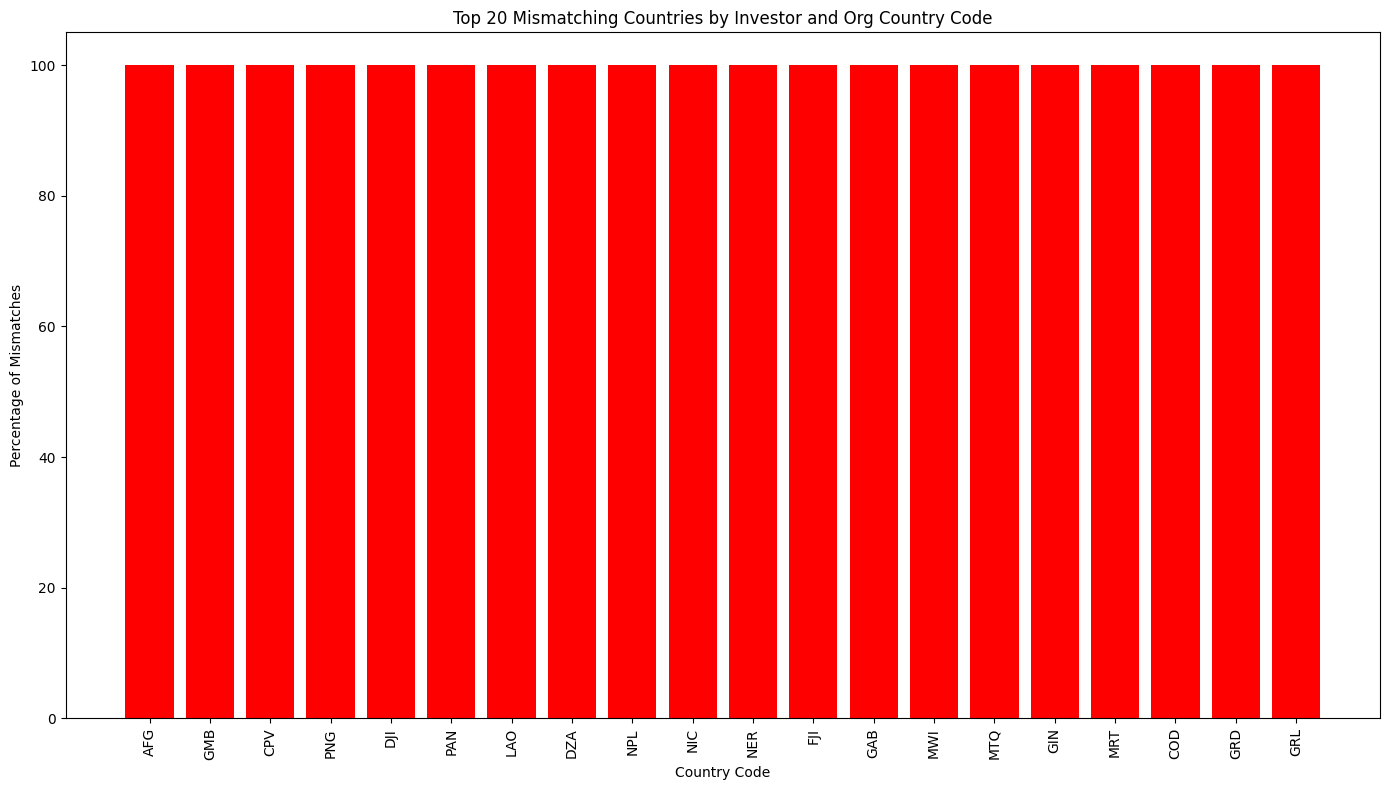

In [44]:
# Aggregate the data
country_match_summary = df_geo.groupby('org_country_code')['country_code_match'].value_counts(normalize=True).unstack().fillna(0)

# Sort by matches and mismatches, then select top 20
top_matching_countries = country_match_summary[True].sort_values(ascending=False).head(20)
top_mismatching_countries = country_match_summary[False].sort_values(ascending=False).head(20)

# Prepare the data for plotting - Matches
countries_matches = top_matching_countries.index
matches_percentage = top_matching_countries.values * 100  # Convert to percentage

# Plotting - Matches
plt.figure(figsize=(14, 8))
plt.bar(countries_matches, matches_percentage, color='green')
plt.xlabel('Country Code')
plt.ylabel('Percentage of Matches')
plt.title('Top 20 Matching Countries by Investor and Org Country Code')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Prepare the data for plotting - Mismatches
countries_mismatches = top_mismatching_countries.index
mismatches_percentage = top_mismatching_countries.values * 100  # Convert to percentage

# Plotting - Mismatches
plt.figure(figsize=(14, 8))
plt.bar(countries_mismatches, mismatches_percentage, color='red')
plt.xlabel('Country Code')
plt.ylabel('Percentage of Mismatches')
plt.title('Top 20 Mismatching Countries by Investor and Org Country Code')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [45]:
for index, column_name in enumerate(df_geo.columns):
    print(f"Column number {index}: {column_name}")

Column number 0: investment_uuid
Column number 1: investment_name
Column number 2: investment_type
Column number 3: investor_uuid
Column number 4: investor_name
Column number 5: investor_type
Column number 6: is_lead_investor
Column number 7: investor_country_code
Column number 8: investor_state_code
Column number 9: investor_region
Column number 10: investor_city
Column number 11: investor_types
Column number 12: investor_num_of_investments
Column number 13: founded_on
Column number 14: closed_on
Column number 15: fr_uuid
Column number 16: name
Column number 17: type
Column number 18: org_country_code
Column number 19: org_state_code
Column number 20: org_region
Column number 21: org_city
Column number 22: fr_num_of_investors
Column number 23: org_uuid
Column number 24: org_name
Column number 25: lead_investor_uuids
Column number 26: country_code_match
